In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [35]:
#sample data for sentiment analysis
data = {
    "Review_ID": list(range(1, 16)),
    "Review_Text": [
        "I love this phone, the camera is amazing!",
        "Worst experience ever. The phone stopped working in 2 days.",
        "Decent product for the price. Battery life is good.",
        "Absolutely fantastic! I'm very happy with this purchase.",
        "Not worth the money. Poor quality and bad customer support.",
        "Great value for the price. Works smoothly and looks premium.",
        "Terrible design. It feels cheap and breaks easily.",
        "Best phone I've ever had. Super smooth and reliable.",
        "Disappointed. Expected better performance for the price.",
        "Very satisfied with this item. Would buy again.",
        "Poor battery and heating issues after just a week.",
        "Amazing performance and build quality. Loved it!",
        "Bad packaging and delayed delivery ruined the experience.",
        "I'm impressed. Battery lasts long and display is crystal clear.",
        "Waste of money. Software is buggy and crashes a lot."
    ],
    "Sentiment": [
        "Positive", "Negative", "Neutral", "Positive", "Negative",
        "Positive", "Negative", "Positive", "Negative", "Positive",
        "Negative", "Positive", "Negative", "Positive", "Negative"
    ]
}


In [36]:
df=pd.DataFrame(data)
df.head()

,Review_ID,Review_Text,Sentiment
0,1,"I love this phone, the camera is amazing!",Positive
1,2,Worst experience ever. The phone stopped worki...,Negative
2,3,Decent product for the price. Battery life is ...,Neutral
3,4,Absolutely fantastic! I'm very happy with this...,Positive
4,5,Not worth the money. Poor quality and bad cust...,Negative


<Axes: xlabel='Sentiment'>

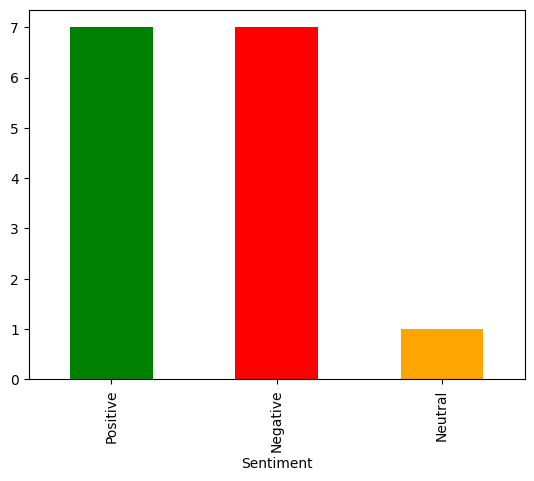

In [37]:
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'orange'])

### Preprocessing

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_ID    15 non-null     int64 
 1   Review_Text  15 non-null     object
 2   Sentiment    15 non-null     object
dtypes: int64(1), object(2)
memory usage: 492.0+ bytes


In [39]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# nltk.download('punkt')
# nltk.download('stopwords')

### Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
bow=cv.fit_transform(df['Review_Text'])
print(bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
print(cv.vocabulary_)

print(bow.shape)

{'love': 50, 'this': 75, 'phone': 57, 'the': 74, 'camera': 13, 'is': 40, 'amazing': 3, 'worst': 84, 'experience': 29, 'ever': 27, 'stopped': 70, 'working': 82, 'in': 39, 'days': 19, 'decent': 20, 'product': 61, 'for': 32, 'price': 60, 'battery': 6, 'life': 46, 'good': 33, 'absolutely': 0, 'fantastic': 30, 'very': 78, 'happy': 36, 'with': 81, 'purchase': 62, 'not': 53, 'worth': 85, 'money': 52, 'poor': 58, 'quality': 63, 'and': 4, 'bad': 5, 'customer': 18, 'support': 72, 'great': 34, 'value': 76, 'works': 83, 'smoothly': 68, 'looks': 48, 'premium': 59, 'terrible': 73, 'design': 23, 'it': 42, 'feels': 31, 'cheap': 14, 'breaks': 9, 'easily': 26, 'best': 7, 've': 77, 'had': 35, 'super': 71, 'smooth': 67, 'reliable': 64, 'disappointed': 24, 'expected': 28, 'better': 8, 'performance': 56, 'satisfied': 66, 'item': 43, 'would': 86, 'buy': 12, 'again': 2, 'heating': 37, 'issues': 41, 'after': 1, 'just': 44, 'week': 80, 'build': 11, 'loved': 51, 'packaging': 55, 'delayed': 21, 'delivery': 22, 'r

In [49]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())

[[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 1 0 0 0 0 0 0 0 1 0 1 0 0]]
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
  0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]]


In [50]:
for i in range(len(bow.toarray())):
    print(bow[i].toarray())
# print(bow[0].toarray().shape)


[[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 1 0 0 0 0 0 0 0 1 0 1 0 0]]
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
  0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]]
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 1 0 0 1 0 0 0 0 0]]
[[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
  1 0 1 0 0 0 0 0 0 0 0 0 0 1 0]]
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
  0 0 0 0 0 0 0 